In [2]:
import cv2
import imutils

In [3]:
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
image = cv2.imread('C:/Users/rs97r/Downloads/TopDownHumanDetection_4032x3024.jpg')  
image = imutils.resize(image, width = 3500) 
(humans, _) = hog.detectMultiScale(image, winStride=(5, 5), padding=(3, 3),scale=1.21)
print('Human Detected :', len(humans))
for (x, y, w, h) in humans: 
    cv2.rectangle(image, (x, y),  
                  (x + w, y + h),  
                  (0, 0, 255), 2)  
cv2.imshow("Image", image) 
cv2.waitKey(0)  
cv2.destroyAllWindows()

Human Detected : 11


In [4]:
import numpy
import matplotlib.pyplot as plt

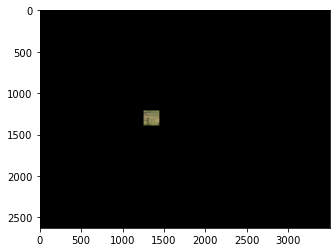

In [5]:
first_bb_points = [[1250, 1210], [1440, 1210], [1440, 1390], [1250, 1390]]
stencil = numpy.zeros(image.shape).astype(image.dtype)
contours = [numpy.array(first_bb_points)]
color = [255, 255, 255]
cv2.fillPoly(stencil, contours, color)
result1 = cv2.bitwise_and(image, stencil)
result1 = cv2.cvtColor(result1, cv2.COLOR_BGR2RGB)
plt.imshow(result1)

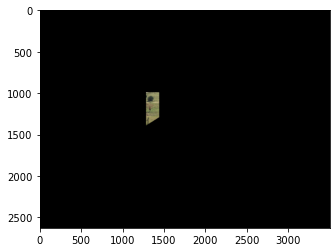

In [6]:
second_bb_points = [[1280, 990], [1438, 990], [1438, 1290], [1280, 1390]]
stencil = numpy.zeros(image.shape).astype(image.dtype)
contours = [numpy.array(second_bb_points)]
color = [255, 255, 255]
cv2.fillPoly(stencil, contours, color)
result2 = cv2.bitwise_and(image, stencil)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

In [7]:
intersection = numpy.logical_and(result1, result2)
union = numpy.logical_or(result1, result2)
iou_score = numpy.sum(intersection) / numpy.sum(union)
print("IoU is", iou_score)

IoU is 0.2994780808327702
